In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Configuración de la base de datos

### Base de datos del conjunto de vehículos 

In [2]:
d19=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce19.csv",sep=";")
d20=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce20.csv",sep=";",encoding="ISO-8859-1" )
d21=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce21.csv",sep=";",encoding="ISO-8859-1")
d22=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce22.csv",sep=";")

In [3]:
df = pd.concat([d19,d20,d21,d22], ignore_index=True)

In [4]:
 df["propulsion"]= df["propulsion"].apply(lambda x: str(x))
    

In [5]:
df.to_csv("matriculas.csv")

In [6]:
NaN=[" ","  ","   "]

In [7]:
dff = pd.read_csv("matriculas.csv",na_values=NaN)

C:\Users\verom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
 dff["propulsion"]= dff["propulsion"].apply(lambda x: str(x))

dff["propulsion"]= dff["propulsion"].apply (lambda x: x [0:1])

In [9]:
dff["date"]=pd.to_datetime ({"year":2000+dff["Ano"], "month":dff["Mes"], "day":1})

In [10]:
dff

,Unnamed: 0,Ano,Mes,clase de matricula,propulsion,servicio,tramitacion,codigo postal,municipio,cod muni,date
0,0,19,1,0,0,B00,1,8397,PINEDA DE MAR,8163,2019-01-01
1,1,19,1,0,0,B00,1,8850,GAVA,8089,2019-01-01
2,2,19,1,6,0,B00,1,8005,BARCELONA,8019,2019-01-01
3,3,19,1,0,0,B00,1,8500,VIC,8298,2019-01-01
4,4,19,1,0,0,B00,1,8028,BARCELONA,8019,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
605236,605236,22,8,0,0,B00,1,8304,MATARO,8121,2022-08-01
605237,605237,22,8,0,0,B00,1,8031,BARCELONA,8019,2022-08-01
605238,605238,22,8,0,0,B00,1,8256,AGUILAR DE SEGARRA,8002,2022-08-01
605239,605239,22,8,0,0,B00,1,8915,BADALONA,8015,2022-08-01


In [11]:
dff["propulsion"].value_counts().index

Index(['0', '1', '2', 'n', '6', '7', '8', '3', '4', '9', 'A', 'G'], dtype='object')

In [12]:
periodo=dff.loc[dff["Ano"].isin([19,20,21,22])]

In [13]:
periodo2=periodo.loc[dff["servicio"].isin(["B00"])]
periodo3=periodo2.loc[dff["tramitacion"].isin(["1"])]
periodo4=periodo3.loc[dff["clase de matricula"].isin([0])]

In [14]:
periodo4["tramitacion"]= periodo4["tramitacion"].apply(lambda x: int(x))

C:\Users\verom\AppData\Local\Temp/ipykernel_6468/3055310681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periodo4["tramitacion"]= periodo4["tramitacion"].apply(lambda x: int(x))


In [15]:
periodo4

,Unnamed: 0,Ano,Mes,clase de matricula,propulsion,servicio,tramitacion,codigo postal,municipio,cod muni,date
0,0,19,1,0,0,B00,1,8397,PINEDA DE MAR,8163,2019-01-01
1,1,19,1,0,0,B00,1,8850,GAVA,8089,2019-01-01
3,3,19,1,0,0,B00,1,8500,VIC,8298,2019-01-01
4,4,19,1,0,0,B00,1,8028,BARCELONA,8019,2019-01-01
5,5,19,1,0,0,B00,1,8100,MOLLET DEL VALLES,8124,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
605236,605236,22,8,0,0,B00,1,8304,MATARO,8121,2022-08-01
605237,605237,22,8,0,0,B00,1,8031,BARCELONA,8019,2022-08-01
605238,605238,22,8,0,0,B00,1,8256,AGUILAR DE SEGARRA,8002,2022-08-01
605239,605239,22,8,0,0,B00,1,8915,BADALONA,8015,2022-08-01


In [20]:
ww=periodo4["date"].value_counts()

### Base de datos del conjunto de vehículos eléctricos

In [21]:
electricos=periodo4.loc[dff["propulsion"].isin(["2"])]

In [22]:
e=electricos.pivot_table( index="codigo postal", columns= "date",values=["propulsion"], aggfunc= "count")

In [23]:
e.columns=e.columns.droplevel()

In [25]:
e.to_csv("codigo_meselec.csv")

In [26]:
w=electricos["date"].value_counts()
w.to_csv("electricos2.csv")

In [70]:
### Base de datos del conjunto de vehículos y electricos dos juntos por codigo postal 

In [27]:
dataa=pd.concat((ww,w), axis=1)

In [28]:
dataa.columns=["total", "electricos"]

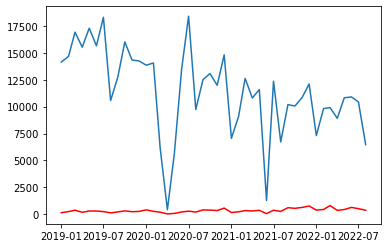

In [29]:
plt.plot(dataa.index, dataa["total"])
plt.plot(dataa.index, dataa["electricos"], c="r")
plt.show()

## Calculo de tendencias unicamente datos totales (vehiculos de todo tipo) 

In [30]:
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
dataa_ciclo, dataa_tend = sm.tsa.filters.hpfilter(dataa['total'])
dataa['tend'] = dataa_tend


In [32]:
fecha=list(range(44))
fechaa=np.reshape(fecha,(1, -1))

In [33]:
x=fecha

In [34]:
# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.poly1d(a, b,3) 

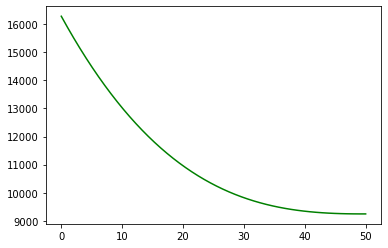

In [35]:
import numpy
MEDV_LSTAT = numpy.poly1d(numpy.polyfit(fecha,dataa["tend"],3))

Line1= numpy.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="g")
plt.show() 

In [36]:
y = dataa["tend"].values
y

array([16074.36016201, 15785.92753118, 15496.28842524, 15203.53578939,
       14906.64926356, 14604.8100278 , 14298.68510639, 13989.59414231,
       13681.35947539, 13375.66369909, 13073.61293221, 12777.96225374,
       12492.25135957, 12220.93559421, 11969.31889505, 11743.85211473,
       11547.3396566 , 11375.51289143, 11220.42860269, 11075.44012831,
       10938.38616335, 10806.26637776, 10677.06457517, 10550.1793927 ,
       10425.82442712, 10306.87628809, 10194.10481999, 10087.52806952,
        9988.68214287,  9899.55031619,  9823.11731429,  9756.98251802,
        9700.33398494,  9650.46415849,  9604.9721484 ,  9561.70864931,
        9519.30312324,  9477.97333933,  9436.55687723,  9394.1063333 ,
        9349.96833082,  9303.19130163,  9253.74244734,  9202.58885003])

In [37]:
x = fecha
y = dataa["tend"].values
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)

In [38]:
t = stats.t.ppf(0.975,0)   

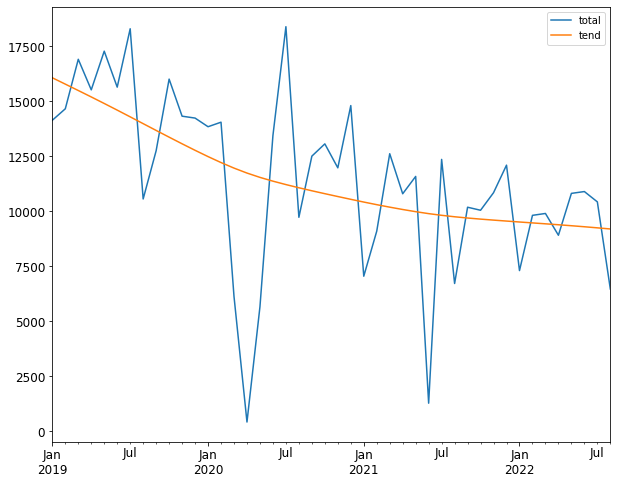

In [39]:
 #graficando la variacion del precio real con la tendencia.
dataa[['total', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

### Calculo de tendencias con intervalos de confianza

In [41]:
x=pd.DataFrame(fecha)

In [42]:
y2 = dataa["total"].values
y2

array([14144, 14665, 16915, 15526, 17284, 15649, 18303, 10566, 12759,
       16014, 14329, 14243, 13850, 14056,  6135,   427,  5668, 13450,
       18397,  9733, 12513, 13070, 11981, 14811,  7055,  9104, 12623,
       10803, 11591,  1283, 12365,  6724, 10191, 10053, 10851, 12103,
        7311,  9822,  9907,  8917, 10820, 10903, 10434,  6475],
      dtype=int64)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5.392
Date:                Tue, 25 Oct 2022   Prob (F-statistic):            0.00327
Time:                        10:04:40   Log-Likelihood:                -419.17
No. Observations:                  44   AIC:                             846.3
Df Residuals:                      40   BIC:                             853.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.666e+04   1932.543      8.622      0.0

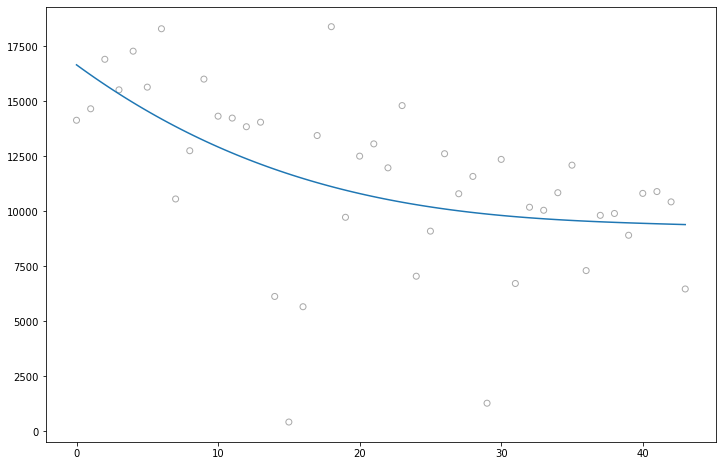

In [43]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y2
# X.shape

model = sm.OLS(y,X).fit()
print(model.summary())

# So, what we want here is not only the final line, but also the standart error related to the line
# TO find that we need to calcualte the predictions for some values of age
test_ages = np.linspace(x.min(),x.max(),100)

X_test = poly.transform(test_ages.reshape(-1,1))
pred = model.predict(X_test)

plt.figure(figsize = (12,8))
plt.scatter(x,y2,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred)

In [44]:
import numpy as np
import pandas as pd
from tqdm import tqdm

class Bootstrap_ci:


    def boot(self,X_data,y_data,R,test_data,model):
        predictions = []
        for i in tqdm(range(R)):
            predictions.append(self.alpha(X_data,y_data,self.get_indices(X_data,200),test_data,model))
           
        return np.percentile(predictions,2.5,axis = 0),np.percentile(predictions,97.5,axis = 0)

    def alpha(self,X_data,y_data,index,test_data,model):
        X = X_data.loc[index]
        y = y_data.loc[index]
        
        lr = model
        lr.fit(pd.DataFrame(X),y)
        
        return lr.predict(pd.DataFrame(test_data))


    def get_indices(self,data,num_samples):
        return  np.random.choice(data.index, num_samples, replace=True)


#### Limite inferior y superior

In [45]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y2

X_test = np.linspace(x.min(),x.max(),100)
X_test_poly = poly.transform(X_test.reshape(-1,1))


bootstrap = Bootstrap_ci()

li,ui = bootstrap.boot(pd.DataFrame(X),pd.DataFrame(y2),1000,X_test_poly,LinearRegression())

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.60it/s]


In [46]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

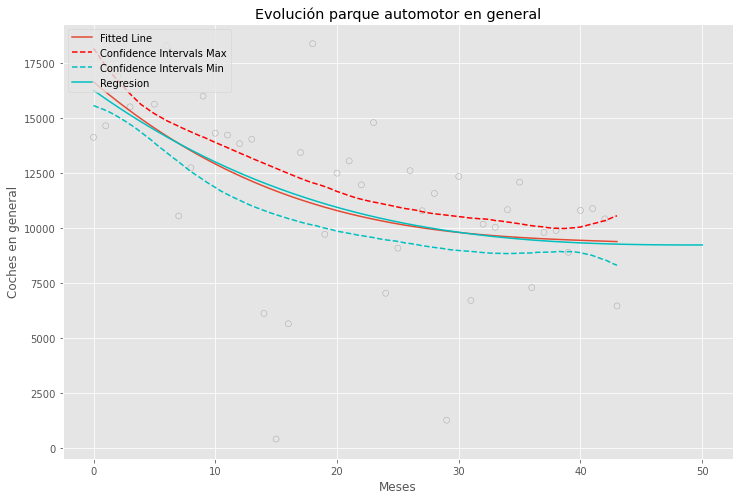

In [47]:
plt.figure(figsize = (12,8))
plt.scatter(x,y2,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred,label = "Fitted Line")
         
plt.plot(test_ages,ui,linestyle = 'dashed',color = 'r',label = 'Confidence Intervals Max')
plt.plot(test_ages,li,linestyle = 'dashed',color = 'c',label = 'Confidence Intervals Min')
Line1= np.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="c", label="Regresion")

plt.title("Evolución parque automotor en general")
plt.xlabel("Meses")
plt.ylabel("Coches en general")
plt.legend(loc='upper left')
plt.show()


## Calculo de tendencias con intervalos de confianza vehiculos eléctricos

In [48]:
y3 = dataa["electricos"].values
y3

array([146, 250, 379, 186, 305, 301, 251, 133, 218, 315, 240, 266, 408,
       274, 194,  34,  81, 213, 292, 206, 407, 387, 350, 574, 165, 229,
       342, 310, 367,  58, 376, 266, 611, 553, 638, 770, 383, 445, 812,
       361, 441, 640, 520, 372], dtype=int64)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     8.997
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           0.000112
Time:                        10:04:50   Log-Likelihood:                -278.17
No. Observations:                  44   AIC:                             564.3
Df Residuals:                      40   BIC:                             571.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.3149     78.425      3.727      0.0

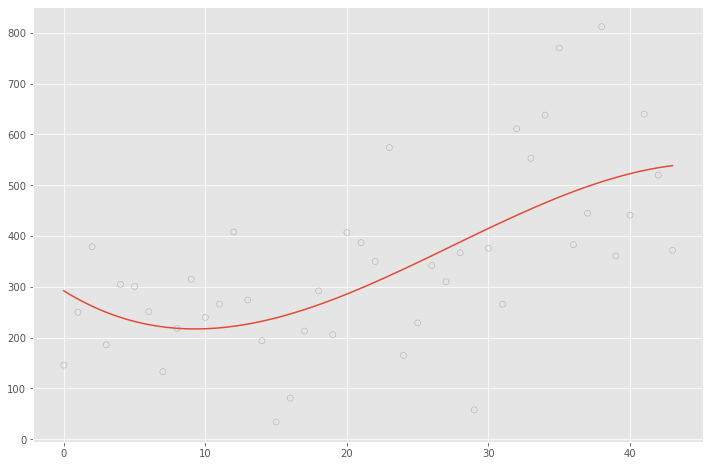

In [49]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y3
# X.shape

model = sm.OLS(y,X).fit()
print(model.summary())

# So, what we want here is not only the final line, but also the standart error related to the line
# TO find that we need to calcualte the predictions for some values of age
test_ages = np.linspace(x.min(),x.max(),100)

X_test = poly.transform(test_ages.reshape(-1,1))
pred = model.predict(X_test)

plt.figure(figsize = (12,8))
plt.scatter(x,y3,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred)

In [50]:
dataa_ciclo, dataa_tendelec = sm.tsa.filters.hpfilter(dataa['electricos'])
dataa['tendelec'] = dataa_tendelec

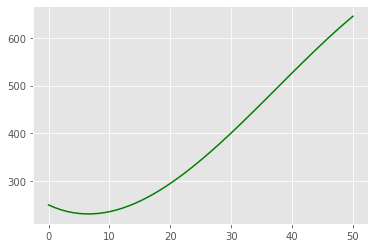

In [51]:
import numpy
MEDV_LSTAT = numpy.poly1d(numpy.polyfit(fecha,dataa["tendelec"],3))

Line1= numpy.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="g")
plt.show() 

In [52]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y3

X_test = np.linspace(x.min(),x.max(),100)
X_test_poly = poly.transform(X_test.reshape(-1,1))


bootstrap = Bootstrap_ci()

li,ui = bootstrap.boot(pd.DataFrame(X),pd.DataFrame(y3),1000,X_test_poly,LinearRegression())

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.11it/s]


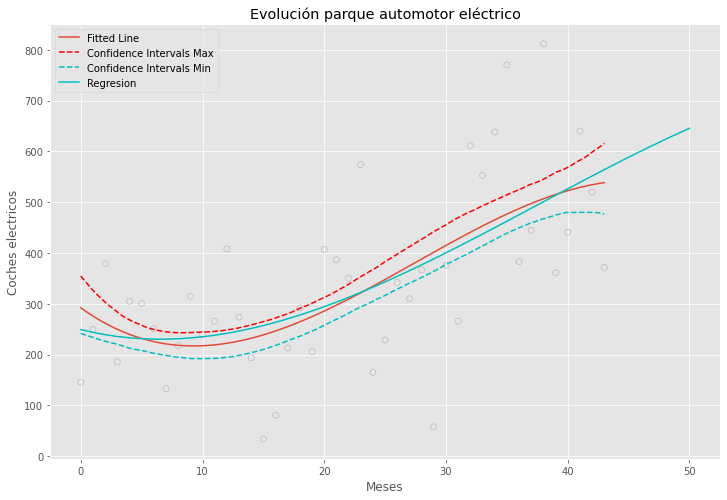

In [53]:
plt.figure(figsize = (12,8))
plt.scatter(x,y3,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred,label = "Fitted Line")
         
plt.plot(test_ages,ui,linestyle = 'dashed',color = 'r',label = 'Confidence Intervals Max')
plt.plot(test_ages,li,linestyle = 'dashed',color = 'c',label = 'Confidence Intervals Min')
Line1= numpy.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="c",label="Regresion")

plt.title("Evolución parque automotor eléctrico")
plt.xlabel("Meses")
plt.ylabel("Coches electricos")
plt.legend(loc='upper left')
plt.show()


## Gráfico de tendencias genrales de ambas series temporales 

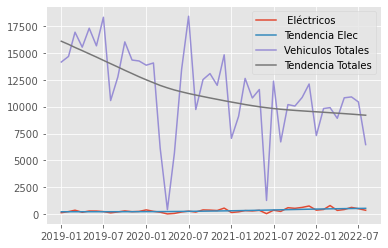

In [72]:
 #graficando la variacion del precio real con la tendencia.
plt.plot( dataa[['electricos', 'tendelec',"total","tend"]], label= [" Eléctricos", "Tendencia Elec", "Vehiculos Totales", "Tendencia Totales"] )
legend = plt.legend()
legend.prop.set_size(14);
